In [2]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.layers import Embedding, Flatten,LSTM
from keras.optimizers import Adam,SGD
from keras.utils import np_utils
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences

/mnt/g/DataProjects/NewsReco/env/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data = pd.read_csv('../data/uci-news-aggregator.csv')
len(data)

422419

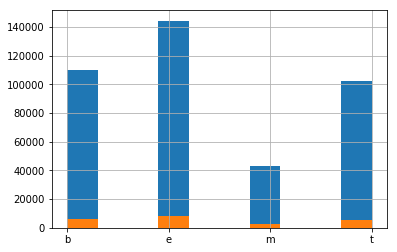

In [5]:
data = data.sample(frac=1.0)
data_train = data[['TITLE','CATEGORY']][0:400000]
data_test = data[['TITLE','CATEGORY']][400000:]

data_train['CATEGORY'].hist()
data_test['CATEGORY'].hist()


In [6]:
vocab_size = 1000
max_seq_len = 25
Hidden_1 = 128
Categories = 4
Optimizer = Adam()
Epochs = 3
Verbose = 1
Batch_size = 5000

In [7]:
encoded_docs = [one_hot(d, vocab_size) for d in data_train['TITLE']]
padded_docs = pad_sequences(encoded_docs, maxlen=max_seq_len, padding='post')
labels = pd.get_dummies(data_train['CATEGORY'])

In [8]:
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=64, input_length=max_seq_len))
# model.add(Flatten())
model.add(LSTM(Hidden_1))
model.add(Dense(Categories, activation='sigmoid'))
# compile the model
model.compile(optimizer=Optimizer, loss='categorical_crossentropy', metrics=['acc'])
# summarize the model
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 25, 64)            64000     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               98816     
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 163,332
Trainable params: 163,332
Non-trainable params: 0
_________________________________________________________________
None


In [9]:
# fit the model
model.fit(padded_docs, labels, batch_size=Batch_size,epochs=Epochs, verbose=Verbose)
# evaluate the model
loss, accuracy = model.evaluate(padded_docs, labels, verbose= Verbose)
print('Accuracy: %f' % (accuracy*100))

Epoch 1/3
400000/400000 [==============================] - 293s 733us/step - loss: 1.2905 - acc: 0.3743
Epoch 2/3
400000/400000 [==============================] - 298s 745us/step - loss: 0.9904 - acc: 0.5749
Epoch 3/3
400000/400000 [==============================] - 98s 244us/step
Accuracy: 73.094000


In [28]:
model.save('../models/model_v2_lstm.h5')


In [21]:
encoded_docs_test = [one_hot(d, vocab_size) for d in data_test['TITLE']]
padded_docs_test = pad_sequences(encoded_docs_test, maxlen=max_seq_len, padding='post')
labels_test = pd.get_dummies(data_test['CATEGORY'])

In [27]:
for i in range(10):
    pred = model.predict(np.array([padded_docs_test[i]]))
    print(pred)
    
    print(labels_test[i:i+1])

[[0.5499143  0.16838655 0.8155271  0.2339728 ]]
        b  e  m  t
243813  0  0  1  0
[[0.08030514 0.03154697 0.01118818 0.9379537 ]]
        b  e  m  t
384884  0  0  0  1
[[0.14194585 0.8353058  0.6841906  0.11958988]]
        b  e  m  t
348087  1  0  0  0
[[0.17475155 0.33154544 0.8557306  0.2170541 ]]
       b  e  m  t
15350  0  0  1  0
[[0.84438145 0.00809592 0.00389583 0.6092182 ]]
        b  e  m  t
197857  0  0  0  1
[[0.41963905 0.7534454  0.07118313 0.12626669]]
        b  e  m  t
290350  1  0  0  0
[[0.04735638 0.02551025 0.01282508 0.9327696 ]]
        b  e  m  t
371774  0  0  0  1
[[0.02157919 0.00553341 0.00416548 0.9299806 ]]
        b  e  m  t
318019  0  0  0  1
[[0.11975791 0.9481775  0.01865451 0.05841629]]
        b  e  m  t
377377  1  0  0  0
[[0.02089472 0.00554251 0.00419761 0.93047696]]
        b  e  m  t
176795  0  0  0  1
